# Today I Learned

## 2023-07-14

##### 虽然在Main() 方法的作用域内声明了两个变量 j, 这段代码也会编译：一个是在类级别上定义的 j, 在类Progmm 删除前（在本例中，是 Ma 亩 0 方法终止，程序结束时）是不会超出作用域的：一个是在 Ma 中定义的 j 。这里，在 Main() 方法中声明的新变量 j 隐藏了同名的类级别变量，所以在运行这段代码时，会显示数字 30 。但是，如果要引用类级别变量，可以使用语法 object.fieldname, 在对象的外部引用类或结构的字段。在上面的例子中，访问静态方法中的一个静态字段，所以不能使用类的实例，只能使用类本身的名称。如果要访问实例字段（该字段属于类的一个特定实例），就需要使用 this 关键字。

In [ ]:
using System;

    public class Program{
        static int j = 0;
        private int i = 10;
        public static void Main(string[] args){

            int j = 20;
            Console.WriteLine(j); // 20
            Console.WriteLine(Program.j); // 0
            new Program().PrintField();
        }

        public void PrintField(){
            Console.WriteLine(this.i); // this for class field
        }
    }
Program.Main(new string[] {"a","b"});

#### 如何在PolyPlot中使用Python内核，
- 在Annoconda Prompt 中打开项目
- code . 
- 在cell中执行 

In [17]:
#!connect jupyter --kernel-name <YourKernelName> --kernel-spec python3

#### 如何使用github创建多分支仓库


1. git init <RepoName>
2. git add . 
3. git commit -m ""
4. git remote add <remoteName> <RepoUrl>
5. git push --set-upstream <remoteName> <branch>

#### 静态构造器


##### 编写静态构造函数的一个原因是，类有一些静态字段或属性，需要在第一次使用类之前，从外部源中初始化这些静态字段和属性。

In [6]:
using System.IO;
using System.Drawing;
class MyClass{
    static FileStream fs;
    static MyClass(){
        //initial fs here 
    }
}

public static class UserPreference{
    static Color BackGroundColor{get;}

    static UserPreference(){

        var time = DateTime.Now;
        if((time.DayOfWeek & (DayOfWeek.Sunday | DayOfWeek.Saturday))>0){
            BackGroundColor = Color.Green;
        }else{
            BackGroundColor = Color.Red;
        }
    }
}

#### Use Nullable<T>

In [7]:
Nullable<int> x;
x = 5;
x +=3;
if(x.HasValue){
    Console.WriteLine(x.Value);
}

8


#### 泛型约束

In [8]:
public class A<T>
    where T:struct{};
public class B<TKey,TValue>
    where TKey:class{};
public class C<T>
    where T:IFoo{};


#### 带委托的泛型方法

In [10]:
public T2 Accumulate<T1,T2>(IEnumerable<T1> source,Func<T1,T2,T2> action ){

    T2 sum = default;
    foreach(var item in source)
    {
        sum  = action(item,sum);
    }
    return sum;
}

#### 泛型方法重载
##### 从泛型维度和方法参数维度进行重载

In [16]:
public class GenericMethodOverLoad{
    public void Foo<T>(T obj){
        Console.WriteLine($"Foo<T(T obj)>/ obj type{obj.GetType().Name}");
    }

    public void Foo( int x) => Console.WriteLine($"Foo(int x)");

    public void Foo<T1,T2>(T1 obj1,T2 obj2) => Console.WriteLine($"Double Generi");

    public void Foo<T>(T obj, int x){
        Console.WriteLine($"Foo<T(T obj)>/ obj type{obj.GetType().Name}");
    }
    //Not usual usage
    public void Foo<T>(int x, int y){}

}

#### 运算符和转换

In [30]:
struct Point{
    public int x {get;}
    public int y {get;}
}

unsafe{
  int x = sizeof(Point);
}

var obj = (object) x;
var obj1 = obj;

object.ReferenceEquals(obj1,obj);

//don't use this method on valueType variable
int a = 1;
object.ReferenceEquals(a,a)  //false 

False

#### 运算符重载

In [33]:
public struct Vector{
    public int X {get;}
    public int Y {get;}

    public Vector(int x, int y){
        X = x;
        Y = y;
    }

    public Vector(Vector v){
        X = v.X;
        Y = v.Y;
    }

    public static Vector operator +(Vector v1,Vector v2) => new Vector( v1.X + v2.X , v1.Y+v2.Y);

    public static Vector operator * (Vector v1, Vector v2) => new Vector(v1.X*v2.X, v1.Y*v2.Y);
}


##### 自定义重载运算符


In [40]:
public class PersonCollection{
    public class Person{
        public int Age {get; set;}
        public string Name {get;set;}
        public DateTime Birth {get;set;}
    }

    public Person[] Persons {get;}

    public IEnumerable<Person> this[DateTime birthDay]{
        get{
            return Persons.Where(p=> p.Birth == birthDay);
        }

        set{

        }
    }

    public Person this[int index]{
        get{
            return Persons[index];
        }

        set{
            Persons[index] = value;
        }
    }
}

##### 自定义隐式类型转换

In [42]:
public struct Currency{
    public int Dolloar {get;}
    public double cent {get;}

    //ctor 

    //implict convert
    public static implicit operator Currency(double value){
        return new Currency();
    }
}

####  使用Span操作托管内存

In [48]:
public Span<T> CreateSlice<T>(Span<T> source){


    int[] arr = {1,2,3,5,5,6,76};

    Span<int> s0 = new Span<int>(arr);
    Span<int> s1 = new Span<int>(arr, 1,5);
    Span<T> s2 = source.Slice(start: 3, length:5);

    return s2;
}

private void ChangeValues<T>(Span<T> span1, Span<T> span2){

    Span<T> span4  = span1.Slice(4);
    span4.Clear();

    span4.Fill(default);

    var span5 = span2.Slice(1,4);
    span5.CopyTo(span1);

    if(!span1.TryCopyTo(span5)){
        Console.WriteLine("copy failed"+ span5.Length);
    }

    //use ReadOnlySpan
    T[] arr = span1.ToArray();
    ReadOnlySpan<T> rsp = new ReadOnlySpan<T>(arr);
    //method same as span 
}

##### 使用数组池避免大量数组创建

In [ ]:
using System.Buffers;
//create ArrayPool
ArrayPool<int> pool = ArrayPool<int>.Create(maxArrayLength:40000, maxArraysPerBucket: 10);


//use predefined ArrayPool
ArrayPool<int> sharedPool = ArrayPool<int>.Shared;

//rent the memory alloc
private void UseSharedPool(){
    for(int i =0; i<10;){

        i++;
        int arrLength = (i+1) <<10;
        int[] arr = sharedPool.Rent(arrLength);
        Console.WriteLine($"Request arr length {arrLength}, receive {arr.Length}");
        sharedPool.Return(arr,true);
    }
}

UseSharedPool();

//return to ArrayPool


In [ ]:
delegate void SaySomething(string Content);
var s = new SaySomething(s=> Console.WriteLine("Hello"+s) );
s.GetType().FullName

In [72]:
class MathOpreations{
    public static double Double(double x) =>2*x;
    public static double Square(double x)=>Math.Pow(x,2);
}

delegate double DoubleOp(double x);

DoubleOp[] ops = {
    MathOpreations.Double,
    MathOpreations.Square
};

double x = 3.0f;
foreach( var op in ops){
    Console.WriteLine(op.Invoke(x));
}

6
9


#### 事件机制模型


In [92]:
// event publisher


class EventPublisher{

    public delegate void MyEventHandler(object sender, MyEventArgs args);

    MyEventHandler Handler;
    //event 
    public event MyEventHandler OrdeCreated {
        add{
            Handler += value;
        }   
        remove{
            Handler -= value;
        }
    }

    //only raise the event in the class

    public void OnOrdeCreated(){
        var args = new MyEventArgs(){id = 1, person = "jack", time = DateTime.Now};
        Handler.Invoke(this,args);
    }
}

//eventargs 
public struct MyEventArgs{
    public long id{get;set;} 
    public string person{get;set;}
    public DateTime time {get;set;}
    //ctor
    
}

//event Handler

class MyEventHandler{
    public void Handler(object sender, MyEventArgs args){

    }
}

class Client{

//subscribe the event 
    public static void Subscribe(){
        var publisher = new EventPublisher();
        var subscriber = new MyEventHandler();
        publisher.OrdeCreated += subscriber.Handler;
        publisher.OrdeCreated += (sender,args)=>{
            Console.WriteLine(string.Format("sender is {0}, args is {1}",sender,args));
        };
    }
   
}

#### 字符串格式


In [94]:
int i =2023;
Console.WriteLine($" {i:n}, {i:e}, {i:x}, {i:c}")

 2,023.00, 2.023000e+003, 7e7, $2,023.00


#### 集合框架

In [110]:
using System.Collections.ObjectModel;
List<int> arr = new List<int>() {1,2,3,4,5,6,7,8,9};
int index = 1;
arr.Add(1);
arr.AddRange(GetNumbers(10));
arr.Remove(1);
arr.RemoveAll(i=>i%2 is 0);
arr.RemoveAt(index);
arr.Find(i=>i==1);
var ints = arr.FindAll(i=>i%2 is not 0);
public IEnumerable<int> GetNumbers(int count){
    for(int i =0; i<count;i++){
        yield return i+10;
    }

    yield break;
}


//ReadOnlyCollection
ReadOnlyCollection<int> roc = arr.AsReadOnly();


In [115]:
var books = new SortedList<string,string>();
books.Add("Professional WPF","aaaa");
books.Add("Professional WPF1","aaaa");
foreach((string bookname, string bookisbn) in books){
    Console.WriteLine(bookname+"--->"+bookisbn);
}

Professional WPF--->aaaa
Professional WPF1--->aaaa


#### 特殊的集合类
- 位数组和位矢量
- 使用可观察的集合
- 使用不可变的集合
- 使用并发集合

In [126]:
BitArray arr = new BitArray(8,true);
arr.Set(1,false);
arr.RightShift(2);
public string GetBitsFormat(BitArray bits){
    var sb = new StringBuilder();
    for(int i =0;i<bits.Length;i++){

        int a = bits[i]?1:0;
        sb.Append($"{a}");
    }
    return sb.ToString();
}

GetBitsFormat(arr)

11111100

In [151]:
using System.Collections.Specialized;
BitVector32 bv = new BitVector32(0xff);
int bit1 = BitVector32.CreateMask();
int bit2 = BitVector32.CreateMask(bit1);
int bit3 = BitVector32.CreateMask(bit2);


//section 
int received =  0x79abcdef;
BitVector32 bv1 = new BitVector32(received);


In [161]:
//ObservableCollection 
string[] arr;
var data = new ObservableCollection<string>();
data.CollectionChanged += (sender,args)=> Console.WriteLine(args.Action);
data.Add("One");
data.Add("Two");

Add
Add


In [174]:
//Immuteable collection
using System.Collections.Immutable;
var a1 = ImmutableArray.Create<string>();
var a2 = a1.Add("s");
a1.Remove("s");
// a1 is an empty array


//First fill the list and then make it immuteable
var list = new List<int>(){1,2,34,5,6,7};
var imList = list.ToImmutableList<int>(); // imList will always remain the state
var changedList = imList.Add(20);
imList

[ 1, 2, 34, 5, 6, 7 ]

In [180]:
// using ImmutableBuilder 
var builder = imList.ToBuilder();
//use the builder to change the list 
//use the for loop  not ues forEach
for(int i=0;i<builder.Count;i++){

    int  a = builder[i];
    if(a%2 == 0){
        builder.Remove(a);
    }
}
builder.ToImmutable()

[ 1, 34, 5, 7 ]

##### 并发集合
将并发集合类用于管道，一个任务向一个集合写入一些内容，同时另一个任务从该集合中读取内容

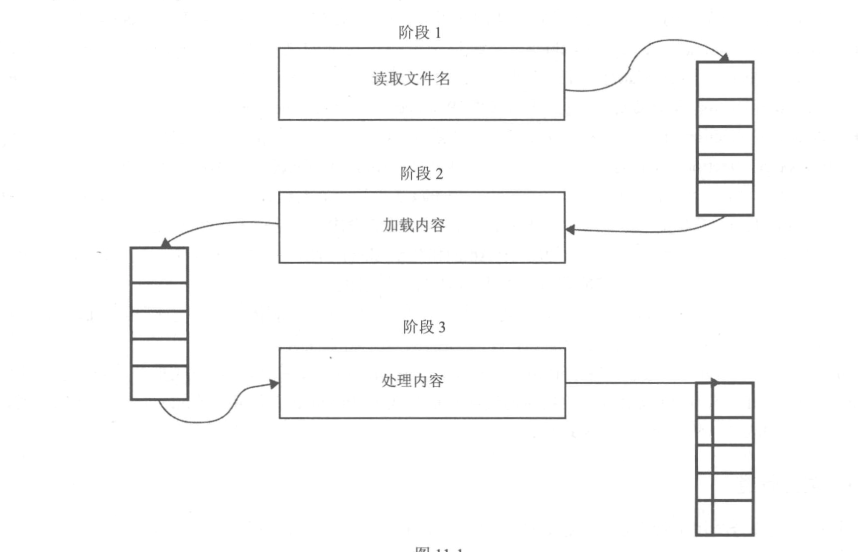

In [200]:
using System.Collections.Concurrent;
using System.IO;
public class Info{
    //ctorp
    public string Word{get; set;}
    public int Count{get; set;}
    public string Color{get; set;}
}

public static async Task StartPipelineAsync(){
    var fileNames = new  BlockingCollection<string>();
    var lines = new  BlockingCollection<string>();
    var words = new ConcurrentDictionary<string,int>();
    var items = new BlockingCollection<Info>();
    var coloredItems = new BlockingCollection<Info>();

    Task t1 = PipeLineStages.ReadFileNameAsync("../TIL",fileNames);
    Task t2 = PipeLineStages.LoadContentAsync(fileNames,lines);
    Task t3 = PipeLineStages.ProcessContentAsync(lines,words);
    await Task.WhenAll(t1,t2,t3);
    Task t4 = PipeLineStages.TransferContentAsync(words,items);
    Task t5 = PipeLineStages.AddColorAsync(items,coloredItems);
    Task t6 = PipeLineStages.ShowContentAsync(coloredItems);

    await Task.WhenAll(t4,t5,t6);

}

public static class PipeLineStages{
    //phase 1
    public static Task ReadFileNameAsync(string path,BlockingCollection<string> output){

        return Task.Factory.StartNew(
            ()=>{

                foreach(string names in Directory.EnumerateFiles(path,"*.cs",SearchOption.AllDirectories)){
                    output.Add(names);
                
                }

                output.CompleteAdding();
            },TaskCreationOptions.LongRunning
        );
    }

    //phase 2 
    public static async Task LoadContentAsync(BlockingCollection<string> input,BlockingCollection<string> output){

        //use input.GetConsumingEnumerable() instead of input for enumerable, otherwise only can read the current state of input
        foreach(var filename in input.GetConsumingEnumerable()){
            using(FileStream fs = File.OpenRead(filename)){
                var reader = new StreamReader(fs);
                string line = null;
                while( (line= await reader.ReadLineAsync()) is not null){
                    output.Add(line);
                }
            }
        }

        output.CompleteAdding();
    }

    //phase 3 split the word in input and count the word, then store them in Dictionary

    public static Task ProcessContentAsync(BlockingCollection<string> input, ConcurrentDictionary<string,int> output){
        return Task.Factory.StartNew(
            ()=>{
                foreach(var line in input.GetConsumingEnumerable()){
                    char[] splitor = {' ', ';', '\t', '{', '}', '(', ')' ,':', ',' ,'"'};
                    string[] words = line.Split(splitor);
                    foreach(var word in words.Where(w=>!string.IsNullOrEmpty(w))){
                        output.AddOrUpdate(key:word, addValue:1, updateValueFactory: (s,i)=> ++i);
                    }
                }
            },
            TaskCreationOptions.LongRunning
        );
    }


    //phase 4 read data from dict and cast it to Info, then add it to syncOutput
    public static Task TransferContentAsync(ConcurrentDictionary<string, int> input, BlockingCollection<Info> output){
        return Task.Factory.StartNew(
            ()=>{
                foreach(var word in input.Keys){
                    if(input.TryGetValue(word, out var value)){
                        var info = new Info {Word = word, Count = value};
                        output.Add(info);
                    }
                }

                output.CompleteAdding();
            },TaskCreationOptions.LongRunning
        );
    }

    //phase 5 According to Count, set the Color of Info object

    public static Task AddColorAsync(BlockingCollection<Info> input, BlockingCollection<Info> output){
        return Task.Factory.StartNew(
            ()=>{
                foreach(var item in input.GetConsumingEnumerable()){

                    var color = item.Count switch{
                        > 40 => "Red",
                        >20 => "Yellow",
                        _ => "Green"
                    };

                    item.Color = color;
                    output.Add(item);
                }

                output.CompleteAdding();
            },TaskCreationOptions.LongRunning
        );
    }

    //phase 6 Print info list to console 
    public static Task ShowContentAsync(BlockingCollection<Info> input){
        return Task.Factory.StartNew(
            () =>{
                foreach(var item in input.GetConsumingEnumerable()){
                    ColoredConsole.WriteLine($"stage 6: {item}",item.Color);
                }
            },TaskCreationOptions.LongRunning
        );
    }

}



##### 使用ColoredConsole向控制台输出信息，可以方便的改变控制台的颜色，并使用同步来避免返回颜色错误的输出

In [188]:
public static class ColoredConsole{

    private static object syncOutput = new object();

    public static void WriteLine(string message){
        lock(syncOutput){
            Console.WriteLine(message);
        }
    }
    public static void WriteLine(string message, string color){
        lock(syncOutput){
            Console.ForegroundColor = (ConsoleColor) Enum.Parse(typeof(ConsoleColor),color);
            Console.WriteLine(message);
            Console.ResetColor();
        }

    }

}

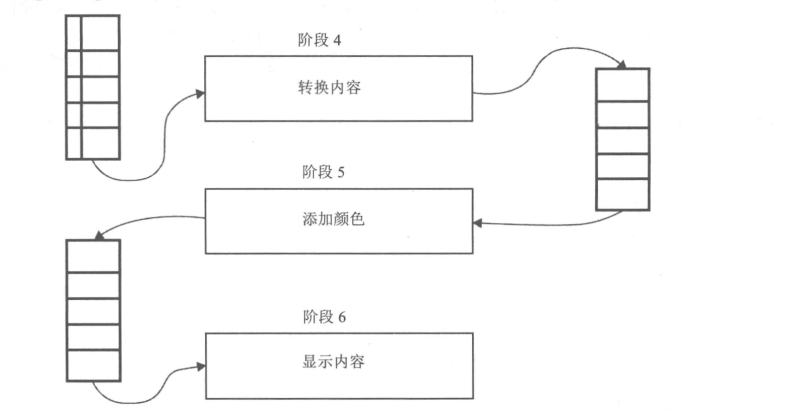

#### LINQ 


#### 函数式编程
- 模式匹配
- 元组
- 本地函数
- 表达式体的成员
- 扩展方法
- using static



##### 模式匹配

In [206]:
var a = 10;
string FizzBuzz(int a ) => (a%2, a%5) switch {
    (0,0) => "FizzBuzz",
    (0,_)=> "Fizz",
    (_,0) => "buzz",
    (_,_) => throw new NotSupportedException()
};

##### Tuple

In [210]:
class Person{
    public string FirstName{get;}
    public string LastName{get;}
}

(string s,int t, Person p) t = ("str",10,new Person());

(int divide, int remain) Divide(int a, int b){
    return (a/b, a%b);
}

##### using static


In [211]:
using static System.Console;
WriteLine("aaaa");

aaaa


#### 异常过滤器

In [213]:
class MyCustomException : Exception{
    public int ErrorCode{get;}
}

try{

    // 

    
}catch(MyCustomException ex) when (ex.ErrorCode == 405){

    //do something
}

#### 反射和元数据
- 自定义特性
- 在运行期间使用反射检查元数据
- 从支持反射的类中构建访问点
- 使用动态类型
- 用DynamicObject 和ExpandoObject创建动态对象

In [ ]:
[AttributeUsage(AttributeTargets.Class | AttributeTargets.Property, Inherited = false, AllowMultiple =false )]
public class CustomerAttribute : Attribute{
    public string Number{get;set;}
}

//Assembly 和 Module 可以放在源代码的任何地方, 应用到整个程序集或模块中
[assembly:CustomerAttribute(params)]
[module:CustomerAttribute(params)]

##### Type

In [235]:
Type t = typeof(double);
double a =10.0;
Type t1 = a.GetType();
Type t2 = Type.GetType("System.Double");

In [231]:
//t1.Namespace;
//t1.IsAbstract
//t1.IsClass
//t1.IsEnum
//t1.IsPrimitive
//t1.IsValueType

True

In [239]:
using static System.Reflection.Assembly;
Assembly containAss = new Assembly(t1);

Error: (2,1): error CS0246: The type or namespace name 'Assembly' could not be found (are you missing a using directive or an assembly reference?)
(2,27): error CS0246: The type or namespace name 'Assembly' could not be found (are you missing a using directive or an assembly reference?)

In [ ]:
Type t = typeof(double);
foreach(var nextMethod in t.GetMethods()){
    Console.WriteLine(nextMethod);
}

In [252]:
t.GetMembers()[^10..]

index value 0 Double MinValue Name MinValue MetadataToken 67109833 FieldHandle System.NotSupportedException: Specified method is not supported.\r\n at System.Reflection.MdFieldInfo.get_FieldHandle()\r\n at lambda_method820(Closure, MdFieldInfo)\r\n at Microsoft.DotNet.Interactive.Formatting.MemberAccessor`1.GetValueOrException(T instance) in D:\a\_work\1\s\src\Microsoft.... TargetSite System.RuntimeFieldHandle get_FieldHandle() Name get_FieldHandle DeclaringType System.Reflection.MdFieldInfo ReflectedType System.Reflection.MdFieldInfo MemberType Method MetadataToken 100686735 Module System.Private.CoreLib.dll MDStreamVersion 131072 FullyQualifiedName C:\Program Files\dotnet\shared\Microsoft.NETCore.App\7.0.7\System.Private.CoreLib.dll ModuleVersionId 42ce119f-fb83-4ddf-92d0-f07e2a06acfe MetadataToken 1 ScopeName System.Private.CoreLib.dll Name System.Private.CoreLib.dll Assembly System.Private.CoreLib, Version=7.0.0.0, Culture=neutral, PublicKeyToken=7cec85d7bea7798e CodeBase file:///C:/Program Files/dotnet/shared/Microsoft.NETCore.App/7.0.7/System.Private.CoreLib.dll FullName System.Private.CoreLib, Version=7.0.0.0, Culture=neutral, PublicKeyToken=7cec85d7bea7798e EntryPoint <null> DefinedTypes [ Microsoft.CodeAnalysis.EmbeddedAttribute, System.Runtime.CompilerServices.IsUnmanagedAttribute, System.Runtime.CompilerServices.NullableAttribute, System.Runtime.CompilerServices.NullableContextAttribute, System.Runtime.CompilerServices.NullablePublicOnlyAttribute, System.Runtime.CompilerServices.ScopedRefAttribute, System.Runtime.CompilerServices.RefSafetyRulesAttribute, Interop, Interop+OleAut32, Interop+Globalization, Interop+Globalization+ResultCode, Interop+BOOL, Interop+Kernel32, Interop+Kernel32+NlsVersionInfoEx, Interop+Kernel32+OVERLAPPED_ENTRY, Interop+Kernel32+CONDITION_VARIABLE, Interop+Kernel32+BY_HANDLE_FILE_INFORMATION, Interop+Kernel32+CRITICAL_SECTION, Interop+Kernel32+FILE_BASIC_INFO, Interop+Kernel32+FILE_ALLOCATION_INFO ... (2412 more) ] IsCollectible False ManifestModule System.Private.CoreLib.dll ReflectionOnly False Location C:\Program Files\dotnet\shared\Microsoft.NETCore.App\7.0.7\System.Private.CoreLib.dll ImageRuntimeVersion v4.0.30319 GlobalAssemblyCache False HostContext 0 IsDynamic False ExportedTypes [ Microsoft.Win32.SafeHandles.CriticalHandleMinusOneIsInvalid, Microsoft.Win32.SafeHandles.CriticalHandleZeroOrMinusOneIsInvalid, Microsoft.Win32.SafeHandles.SafeHandleMinusOneIsInvalid, Microsoft.Win32.SafeHandles.SafeHandleZeroOrMinusOneIsInvalid, Microsoft.Win32.SafeHandles.SafeFileHandle, Microsoft.Win32.SafeHandles.SafeWaitHandle, System.ArgIterator, System.Array, System.Attribute, System.BadImageFormatException, System.Buffer, System.Decimal, System.Delegate, System.Enum, System.Environment, System.Environment+SpecialFolder, System.Environment+SpecialFolderOption, System.Exception, System.GCCollectionMode, System.GCNotificationStatus ... (1223 more) ] IsFullyTrusted True CustomAttributes [ [System.Runtime.CompilerServices.ExtensionAttribute()], [System.Runtime.CompilerServices.CompilationRelaxationsAttribute((Int32)8)], [System.Runtime.CompilerServices.RuntimeCompatibilityAttribute(WrapNonExceptionThrows = True)], [System.Diagnostics.DebuggableAttribute((System.Diagnostics.DebuggableAttribute+DebuggingModes)2)], [System.Reflection.Metadata.MetadataUpdateHandlerAttribute(typeof(System.Reflection.Metadata.RuntimeTypeMetadataUpdateHandler))], [System.CLSCompliantAttribute((Boolean)True)], [System.Runtime.InteropServices.ComVisibleAttribute((Boolean)False)], [System.Runtime.InteropServices.DefaultDllImportSearchPathsAttribute((System.Runtime.InteropServices.DllImportSearchPath)2050)], [System.Reflection.AssemblyMetadataAttribute("Serviceable", "True")], [System.Reflection.AssemblyMetadataAttribute(".NETFrameworkAssembly", "")], [System.Reflection.AssemblyMetadataAttribute("IsTrimmable", "True")], [System.Resources.NeutralResourcesLanguageAttribute("en-US")], [System.Runtime.CompilerServices.DisableRuntime

In [253]:
double.Tau

6.283185307179586

In [259]:
var ass = t.Assembly;
ass.GetTypes().First(a=>a.Name.Contains("io"))

Interop+Globalization

### Flyweight Pattern - Reuse the object 


In [2]:
abstract class Circle{

    //unique state 
    public int X {get;set;}
    public int Y{get;set;}
    public int Radius{get;set;}


    public abstract void Draw(int X, int Y ,int Radius);
    
}


class CircleFlyweight : Circle{

    //repeat state
    public string Color{get;set;}


    public override void Draw(int X, int Y ,int Radius){
        
        //use the intrinstic variable to do work

        Console.WriteLine(Color);
    }

    public CircleFlyweight(string color){
        Color = color;
    }
}


class  FlyWeightFactory{


    private Dictionary<string,CircleFlyweight> _cache = new Dictionary<string,CircleFlyweight>();

    public CircleFlyweight GetFlyweight(string color){

        var exist = _cache.TryAdd(color, new CircleFlyweight(color));
        if(exist) return _cache[color];

        return new CircleFlyweight(color);
    }
}
class CircleContext{
    private CircleFlyweight Flyweight {get;set;}
    private FlyWeightFactory _factory;
    //unique state 
    public int X {get;set;}
    public int Y{get;set;}
    public int Radius{get;set;}

    public CircleContext(int x, int y, int radis, string color){
         X =x; 
         Y =y;
         Radius = radis;
         Flyweight = _factory.GetFlyweight(color);
    }
    
    public void Draw(){
        Flyweight.Draw(X,Y,Radius);
    }
}

### git 分支管理

In [ ]:
git branch dev
git checkout dev

#合并分支 当在新分支做完工作后需要将分支提交到master, 就切换到master仓库,然后执行git merge 分支名
git checkout master 
git merge dev

#查看所有可用分支
git branch -a 

#删除本地分支
git branch -D

#克隆指定分支
git clone -b

### C# Reflection 
1. Late Binding 
2. WinForm UI Properties Window
   

In [5]:
using System;
using System.Reflection;

class Customer{

    public string ID {get;set;} 
    public string Name {get;set;}

    public Customer(string name){
        this.Name = name;
        this.ID = new Guid().Display().ToString();
    }

    public void PrintName(){
        Console.WriteLine(Name);
    }
}

In [10]:
Type customerType = typeof(Customer);

var properties = customerType.GetProperties();
var methods = customerType.GetMethods();
var members = customerType.GetMembers();
var constructors = customerType.GetConstructors();
var memberName = customerType.GetMember("Name");

### Use OptionalAttribute to indicate an optional parameter


In [ ]:
using System.Runtime.InteropServices;
public int GetSum(int first, int second, [Optional] int[] rest){
    int sum = first+second;

    foreach(var i in rest){
        sum += i;
    }

    return sum;
}

GetSum(1,2);

#### 比较匿名类和元组

In [1]:
var dates = new[]
{
    DateTime.UtcNow.AddHours(-1),
    DateTime.UtcNow,
    DateTime.UtcNow.AddHours(1),
};

foreach (var anonymous in
             dates.Select(
                 date => new { Formatted = $"{date:MMM dd, yyyy hh:mm zzz}", date.Ticks }))
{
    Console.WriteLine($"Ticks: {anonymous.Ticks}, formatted: {anonymous.Formatted}");
}

//使用元组
var dates1 = new[]
{
    DateTime.UtcNow.AddHours(-1),
    DateTime.UtcNow,
    DateTime.UtcNow.AddHours(1),
};

foreach (var (formatted, ticks) in
            dates1.Select(
                date => (Formatted: $"{date:MMM dd, yyyy at hh:mm zzz}", date.Ticks)))
{
    Console.WriteLine($"Ticks: {ticks}, formatted: {formatted}");
}

Ticks: 638279512929391929, formatted: Aug 18, 2023 10:28 +00:00
Ticks: 638279548929392061, formatted: Aug 18, 2023 11:28 +00:00
Ticks: 638279584929392062, formatted: Aug 18, 2023 12:28 +00:00
Ticks: 638279512929428183, formatted: Aug 18, 2023 aA 10:28 +00:00
Ticks: 638279548929428187, formatted: Aug 18, 2023 aA 11:28 +00:00
Ticks: 638279584929428188, formatted: Aug 18, 2023 aP 12:28 +00:00
